In [ ]:
#https://www.kaggle.com/datasets/ninadaithal/imagesoasis

In [ ]:
!pip install --quiet tensorflow

In [ ]:
import os
import numpy as np
import shutil
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image, display
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/SideBoys/sem 7/AIHC/Data.zip' -d '/content/Data'
!unzip '/content/drive/MyDrive/SideBoys/sem 7/AIHC/balanced_dataset.zip' -d '/content/balanced_dataset'

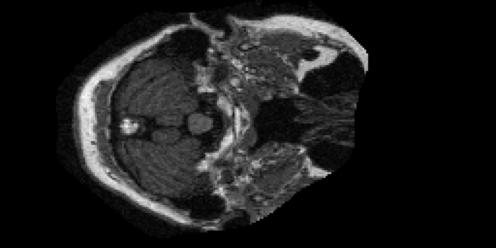

In [ ]:
display(Image(filename='/content/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_102.jpg'))

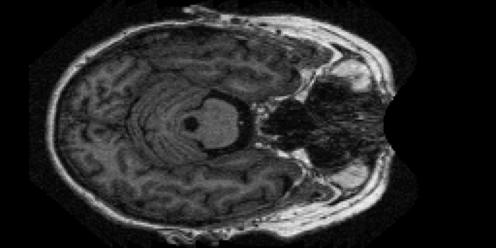

In [ ]:
display(Image(filename='/content/Data/Non Demented/OAS1_0001_MR1_mpr-1_102.jpg'))

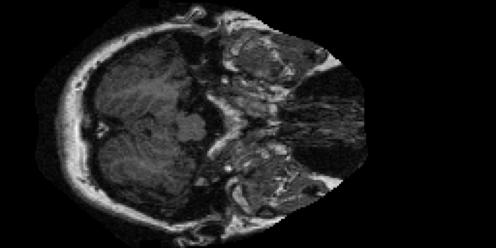

In [ ]:
display(Image(filename='/content/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_100.jpg'))

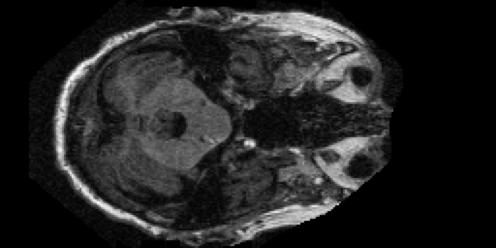

In [ ]:
display(Image(filename='/content/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg'))

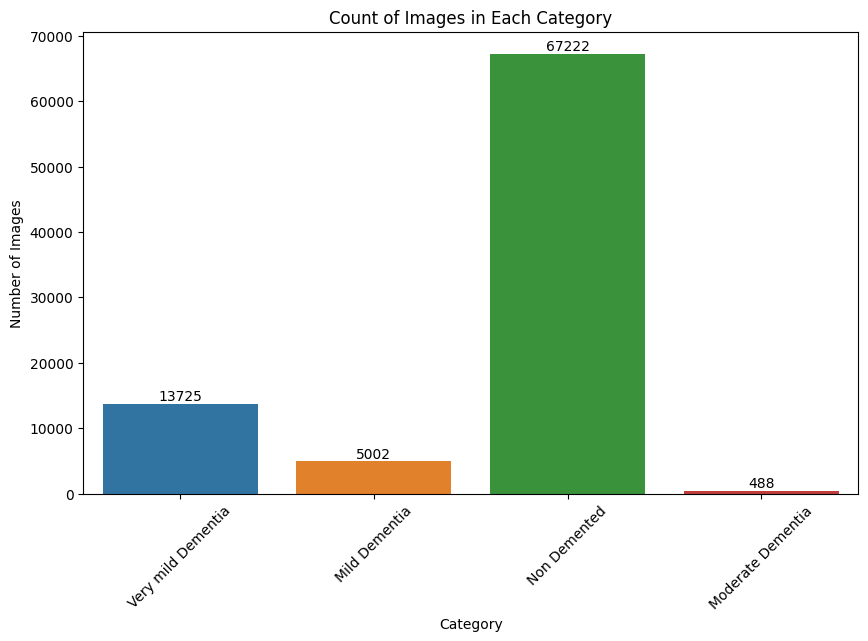

In [ ]:
path_to_dataset_folder = '/content/Data'

def count_images_in_categories(folder_path):
    category_counts = {}
    for category_folder in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category_folder)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            category_counts[category_folder] = num_images
    return category_counts

category_counts = count_images_in_categories(path_to_dataset_folder)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Category')
for index, value in enumerate(category_counts.values()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

# **UNDERSAMPLING DATA**

In [ ]:
5002+488+13725

19215

In [ ]:
print('19215<67222 (grouped dementeds)')

19215<67222 (grouped dementeds)


In [ ]:
from PIL import Image
with Image.open('/content/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg') as img:
  image_width, image_height = img.size
  print('H: '+str(image_height))
  print('W: '+str(image_width))

H: 248
W: 496


In [ ]:
import os
import shutil
import random

# Replace 'path_to_dataset_folder' with the path to the folder containing your dataset
path_to_dataset_folder = '/content/Data'

# Get the number of images in each class
class_sizes = {
    'Mild Dementia': 5002,
    'Moderate Dementia': 488,
    'Very mild Dementia': 13725,
    'Non Demented': 67222
}

# Find the size of the smallest class
smallest_class_size = min(class_sizes.values())

# Create a new folder for the balanced dataset
balanced_dataset_folder = '/content/balanced_dataset'
os.makedirs(balanced_dataset_folder, exist_ok=True)

# Function to randomly select and copy images from a class to the balanced dataset
def copy_images(source_folder, target_folder, num_images):
    images = os.listdir(source_folder)
    selected_images = random.sample(images, num_images)
    for img in selected_images:
        src_path = os.path.join(source_folder, img)
        tgt_path = os.path.join(target_folder, img)
        shutil.copyfile(src_path, tgt_path)

# Copy images from each class to the balanced dataset folder
for class_folder, class_size in class_sizes.items():
    class_folder_path = os.path.join(path_to_dataset_folder, class_folder)
    print(class_folder_path)
    target_class_folder = os.path.join(balanced_dataset_folder, class_folder)
    os.makedirs(target_class_folder, exist_ok=True)
    copy_images(class_folder_path, target_class_folder, smallest_class_size)


/content/Data/Mild Dementia
/content/Data/Moderate Dementia
/content/Data/Very mild Dementia
/content/Data/Non Demented


# **MORE EDA ON BALANCED DATA**

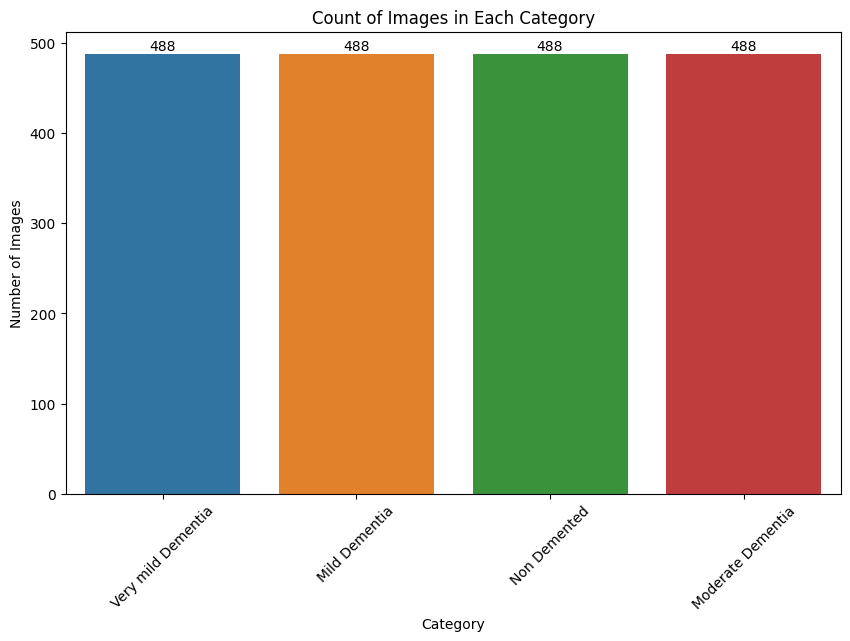

In [ ]:
path_to_dataset_folder = '/content/balanced_dataset/content/balanced_dataset'

def count_images_in_categories(folder_path):
    category_counts = {}
    for category_folder in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category_folder)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            category_counts[category_folder] = num_images
    return category_counts

category_counts = count_images_in_categories(path_to_dataset_folder)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Category')
for index, value in enumerate(category_counts.values()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from PIL import Image
with Image.open('/content/balanced_dataset/content/balanced_dataset/Moderate Dementia/OAS1_0308_MR1_mpr-1_102.jpg') as img:
  image_width, image_height = img.size
  print('H: '+str(image_height))
  print('W: '+str(image_width))

H: 248
W: 496


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2

def load_data(folder_path):
    data = []
    for category_folder in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category_folder)
        if os.path.isdir(category_path):
            for image_file in os.listdir(category_path):
                image_path = os.path.join(category_path, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image_resized = cv2.resize(image, (224, 224))
                feature_vector = image_resized.flatten()
                data.append(feature_vector)
    return np.array(data)

# Load and preprocess the data
data = load_data(path_to_dataset_folder)

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_standardized)

PCA()

Number of principal components for 90% explained variance: 430
Number of principal components for 95% explained variance: 735
Number of principal components for 99% explained variance: 1393


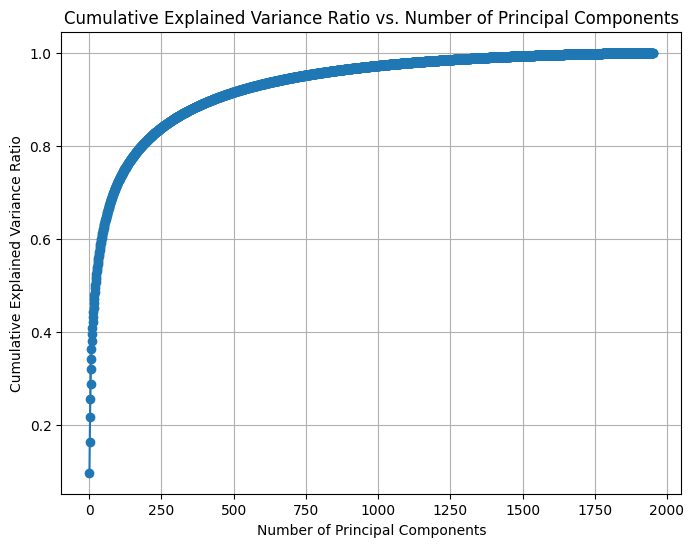

In [ ]:
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

num_components_90_percent = np.argmax(cumulative_explained_variance_ratio >= 0.9) + 1
num_components_95_percent = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1
num_components_99_percent = np.argmax(cumulative_explained_variance_ratio >= 0.99) + 1

print(f"Number of principal components for 90% explained variance: {num_components_90_percent}")
print(f"Number of principal components for 95% explained variance: {num_components_95_percent}")
print(f"Number of principal components for 99% explained variance: {num_components_99_percent}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

# **VGG16 CLASSIFICATION**

In [ ]:
import os
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

input_shape = (224, 224, 3)  # Input shape based on the VGG16 model requirements
num_classes = 4
batch_size = 32
epochs = 10

path_to_balanced_dataset = '/content/balanced_dataset/content/balanced_dataset'

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Create data generators for train, validation, and test sets
data_generator = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    path_to_balanced_dataset,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    path_to_balanced_dataset,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = data_generator.flow_from_directory(
    path_to_balanced_dataset,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for test set
)

Found 1564 images belonging to 4 classes.
Found 388 images belonging to 4 classes.
Found 1952 images belonging to 4 classes.


Epoch 1/10
48/48 [==============================] - 14s 269ms/step - loss: 1.9592 - accuracy: 0.4073 - val_loss: 1.2020 - val_accuracy: 0.5417
Epoch 2/10
48/48 [==============================] - 9s 177ms/step - loss: 1.0026 - accuracy: 0.5599 - val_loss: 1.0598 - val_accuracy: 0.5885
Epoch 3/10
48/48 [==============================] - 7s 154ms/step - loss: 0.8432 - accuracy: 0.6456 - val_loss: 0.9306 - val_accuracy: 0.6354
Epoch 4/10
48/48 [==============================] - 9s 179ms/step - loss: 0.7366 - accuracy: 0.6860 - val_loss: 0.8840 - val_accuracy: 0.5964
Epoch 5/10
48/48 [==============================] - 8s 177ms/step - loss: 0.7143 - accuracy: 0.6906 - val_loss: 0.8727 - val_accuracy: 0.6484
Epoch 6/10
48/48 [==============================] - 7s 155ms/step - loss: 0.6828 - accuracy: 0.6919 - val_loss: 0.8996 - val_accuracy: 0.6589
Epoch 7/10
48/48 [==============================] - 8s 177ms/step - loss: 0.5941 - accuracy: 0.7402 - val_loss: 0.8853 - val_accuracy: 0.6797
Epoch

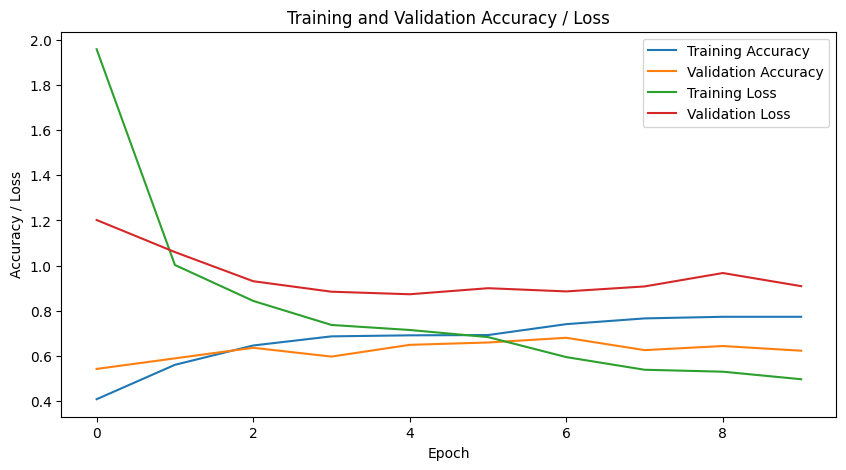

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

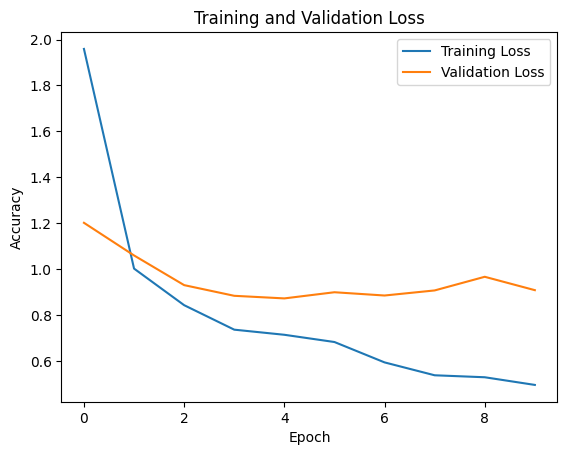

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Save the trained model for future use
model.save('mri_classification_model.h5')

1/1 [==============================] - 1s 709ms/step


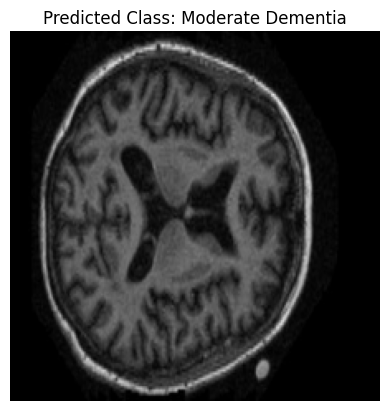

In [ ]:
import os
import numpy as np
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt

input_shape = (224, 224)
num_classes = 4

# path_to_image = '/content/Data/Mild Dementia/OAS1_0053_MR1_mpr-1_121.jpg'
# path_to_image = '/content/Data/Non Demented/OAS1_0001_MR1_mpr-3_143.jpg'
# path_to_image = '/content/Data/Very mild Dementia/OAS1_0015_MR1_mpr-2_110.jpg'
path_to_image = '/content/Data/Moderate Dementia/OAS1_0308_MR1_mpr-3_154.jpg'

model = load_model('mri_classification_model.h5')

img = Image.open(path_to_image).convert('RGB')  # Convert to RGB if necessary
img = img.resize(input_shape)  # Resize the image to the input shape of the model
img_array = np.array(img, dtype='float32')  # Convert to float32
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
cats = ['Mild Dementia',
    'Moderate Dementia',
    'Very mild Dementia',
    'Non Demented']
predicted_class = f'{cats[predicted_class_index]}'  # Since classes start from 1

plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
